# Crude oil price prediction using LSTM

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\hp\Desktop\internship\dataset\Crude Oil Prices Daily.csv")

In [3]:
dataset.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [4]:
dataset.tail()

,Date,Closing Value
8218,7/3/2018,74.19
8219,7/4/2018,NaN
8220,7/5/2018,73.05
8221,7/6/2018,73.78
8222,7/9/2018,73.93


In [5]:
dataset.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8223 non-null   object 
 1   Closing Value  8216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.6+ KB


# Data Preprocessing

In [7]:
dataset.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
dataset.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
dataset.dropna(axis=0,inplace=True)

In [10]:
dataset.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
dataset.shape

(8216, 2)

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.5.0'

In [14]:
import keras

In [15]:
keras.__version__

'2.5.0'

### Selecting Closing value column for prediction

In [16]:
oil = dataset.reset_index()['Closing Value']

In [17]:
oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

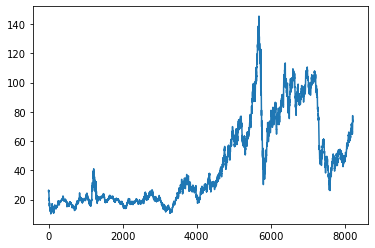

In [18]:
plt.plot(oil)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
oil = scaler.fit_transform(np.array(oil).reshape(-1,1))

In [20]:
print(oil)

[[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


### splitting dataset into train and test split

In [21]:
training_size = int(len(oil)*0.65)
test_size = len(oil)-training_size
train_data,test_data = oil[0:training_size,:],oil[training_size:len(oil),:1]

In [22]:
training_size,test_size

(5340, 2876)

In [23]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [24]:
train_data.shape

(5340, 1)

In [25]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
time_step = 10
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(Y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [28]:
print(X_test.shape), print(Y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [29]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [30]:
Y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [31]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 

In [33]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (10,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(100))
model.add(Dense(70))
model.add(Dense(40))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                7070      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4

In [35]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs = 1000,batch_size = 64,verbose = 1)

Epoch 1/1000
84/84 [==============================] - 6s 28ms/step - loss: 0.0011 - val_loss: 7.6142e-04
Epoch 2/1000
84/84 [==============================] - 1s 18ms/step - loss: 1.3500e-04 - val_loss: 0.0010
Epoch 3/1000
84/84 [==============================] - 1s 17ms/step - loss: 1.3712e-04 - val_loss: 7.6859e-04
Epoch 4/1000
84/84 [==============================] - 1s 17ms/step - loss: 1.2504e-04 - val_loss: 7.4649e-04
Epoch 5/1000
84/84 [==============================] - 1s 18ms/step - loss: 1.2759e-04 - val_loss: 7.4693e-04
Epoch 6/1000
84/84 [==============================] - 2s 19ms/step - loss: 1.4516e-04 - val_loss: 8.8278e-04
Epoch 7/1000
84/84 [==============================] - 2s 22ms/step - loss: 1.3167e-04 - val_loss: 0.0012
Epoch 8/1000
84/84 [==============================] - 2s 26ms/step - loss: 1.2542e-04 - val_loss: 7.1562e-04
Epoch 9/1000
84/84 [==============================] - 1s 17ms/step - loss: 1.3982e-04 - val_loss: 0.0011
Epoch 10/1000
84/84 [==============

Epoch 149/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.5302e-05 - val_loss: 2.4973e-04
Epoch 150/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.1578e-05 - val_loss: 3.3661e-04
Epoch 151/1000
84/84 [==============================] - 4s 50ms/step - loss: 3.0780e-05 - val_loss: 3.3621e-04
Epoch 152/1000
84/84 [==============================] - 4s 52ms/step - loss: 3.3430e-05 - val_loss: 4.3443e-04
Epoch 153/1000
84/84 [==============================] - 5s 59ms/step - loss: 3.1508e-05 - val_loss: 6.5033e-04
Epoch 154/1000
84/84 [==============================] - 3s 33ms/step - loss: 3.5746e-05 - val_loss: 2.6043e-04
Epoch 155/1000
84/84 [==============================] - 3s 34ms/step - loss: 3.4330e-05 - val_loss: 2.7484e-04
Epoch 156/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.2226e-05 - val_loss: 6.4244e-04
Epoch 157/1000
84/84 [==============================] - 4s 43ms/step - loss: 4.0192e-05 - val_loss: 4.5614e-04
E

Epoch 223/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.5198e-05 - val_loss: 5.9210e-04
Epoch 224/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.3383e-05 - val_loss: 7.3127e-04
Epoch 225/1000
84/84 [==============================] - 6s 71ms/step - loss: 3.3815e-05 - val_loss: 2.6656e-04
Epoch 226/1000
84/84 [==============================] - 5s 62ms/step - loss: 3.4595e-05 - val_loss: 3.7385e-04
Epoch 227/1000
84/84 [==============================] - 5s 55ms/step - loss: 3.2125e-05 - val_loss: 2.6270e-04
Epoch 228/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.4561e-05 - val_loss: 6.4604e-04
Epoch 229/1000
84/84 [==============================] - 6s 68ms/step - loss: 3.0708e-05 - val_loss: 3.7425e-04
Epoch 230/1000
84/84 [==============================] - 4s 46ms/step - loss: 3.1180e-05 - val_loss: 3.9054e-04
Epoch 231/1000
84/84 [==============================] - 5s 54ms/step - loss: 3.3007e-05 - val_loss: 4.7281e-04
E

Epoch 297/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.1032e-05 - val_loss: 4.7277e-04
Epoch 298/1000
84/84 [==============================] - 4s 46ms/step - loss: 3.0985e-05 - val_loss: 5.6357e-04
Epoch 299/1000
84/84 [==============================] - 4s 46ms/step - loss: 3.3905e-05 - val_loss: 4.5230e-04
Epoch 300/1000
84/84 [==============================] - 6s 66ms/step - loss: 3.3085e-05 - val_loss: 3.7218e-04
Epoch 301/1000
84/84 [==============================] - 4s 46ms/step - loss: 3.1326e-05 - val_loss: 8.5097e-04
Epoch 302/1000
84/84 [==============================] - 6s 70ms/step - loss: 3.5800e-05 - val_loss: 3.2775e-04
Epoch 303/1000
84/84 [==============================] - 3s 37ms/step - loss: 3.1794e-05 - val_loss: 2.6277e-04
Epoch 304/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.2280e-05 - val_loss: 5.6972e-04
Epoch 305/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.4009e-05 - val_loss: 4.4231e-04
E

Epoch 371/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.1865e-05 - val_loss: 3.4163e-04
Epoch 372/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.3192e-05 - val_loss: 2.7016e-04
Epoch 373/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.1884e-05 - val_loss: 4.0847e-04
Epoch 374/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.1595e-05 - val_loss: 3.8914e-04
Epoch 375/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.1467e-05 - val_loss: 3.0725e-04
Epoch 376/1000
84/84 [==============================] - 4s 52ms/step - loss: 3.2514e-05 - val_loss: 4.9974e-04
Epoch 377/1000
84/84 [==============================] - 4s 43ms/step - loss: 2.9739e-05 - val_loss: 5.9598e-04
Epoch 378/1000
84/84 [==============================] - 6s 70ms/step - loss: 3.3728e-05 - val_loss: 7.8804e-04
Epoch 379/1000
84/84 [==============================] - 6s 71ms/step - loss: 3.4400e-05 - val_loss: 2.7931e-04
E

Epoch 445/1000
84/84 [==============================] - 4s 45ms/step - loss: 3.0652e-05 - val_loss: 5.3851e-04
Epoch 446/1000
84/84 [==============================] - 6s 70ms/step - loss: 2.9953e-05 - val_loss: 4.8619e-04
Epoch 447/1000
84/84 [==============================] - 6s 72ms/step - loss: 2.9894e-05 - val_loss: 4.9034e-04
Epoch 448/1000
84/84 [==============================] - 6s 72ms/step - loss: 2.9366e-05 - val_loss: 2.9164e-04
Epoch 449/1000
84/84 [==============================] - 3s 39ms/step - loss: 2.9631e-05 - val_loss: 3.5615e-04
Epoch 450/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.0746e-05 - val_loss: 5.1078e-04
Epoch 451/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.0998e-05 - val_loss: 6.3234e-04
Epoch 452/1000
84/84 [==============================] - 5s 64ms/step - loss: 3.0373e-05 - val_loss: 7.6085e-04
Epoch 453/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.1537e-05 - val_loss: 2.4921e-04
E

Epoch 519/1000
84/84 [==============================] - 6s 72ms/step - loss: 3.0136e-05 - val_loss: 3.9515e-04
Epoch 520/1000
84/84 [==============================] - 5s 54ms/step - loss: 3.2483e-05 - val_loss: 3.4218e-04
Epoch 521/1000
84/84 [==============================] - 4s 48ms/step - loss: 3.0596e-05 - val_loss: 4.0347e-04
Epoch 522/1000
84/84 [==============================] - 2s 29ms/step - loss: 3.1470e-05 - val_loss: 4.2074e-04
Epoch 523/1000
84/84 [==============================] - 3s 39ms/step - loss: 3.0610e-05 - val_loss: 4.3419e-04
Epoch 524/1000
84/84 [==============================] - 4s 42ms/step - loss: 2.9708e-05 - val_loss: 3.1213e-04
Epoch 525/1000
84/84 [==============================] - 5s 54ms/step - loss: 3.2246e-05 - val_loss: 4.0730e-04
Epoch 526/1000
84/84 [==============================] - 4s 43ms/step - loss: 3.1257e-05 - val_loss: 6.0952e-04
Epoch 527/1000
84/84 [==============================] - 5s 55ms/step - loss: 3.1446e-05 - val_loss: 4.7432e-04
E

84/84 [==============================] - 2s 20ms/step - loss: 3.1216e-05 - val_loss: 4.8694e-04
Epoch 667/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9607e-05 - val_loss: 6.4218e-04
Epoch 668/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0626e-05 - val_loss: 8.5453e-04
Epoch 669/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1466e-05 - val_loss: 5.7497e-04
Epoch 670/1000
84/84 [==============================] - 2s 19ms/step - loss: 2.9573e-05 - val_loss: 3.5481e-04
Epoch 671/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.5141e-05 - val_loss: 4.4393e-04
Epoch 672/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0270e-05 - val_loss: 6.3839e-04
Epoch 673/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0129e-05 - val_loss: 3.8802e-04
Epoch 674/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0858e-05 - val_loss: 4.6322e-04
Epoch 675/1000
8

84/84 [==============================] - 2s 20ms/step - loss: 3.0764e-05 - val_loss: 7.2761e-04
Epoch 741/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.8972e-05 - val_loss: 5.2982e-04
Epoch 742/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1340e-05 - val_loss: 8.3401e-04
Epoch 743/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9329e-05 - val_loss: 7.4491e-04
Epoch 744/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9663e-05 - val_loss: 6.4211e-04
Epoch 745/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0071e-05 - val_loss: 6.4241e-04
Epoch 746/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0593e-05 - val_loss: 6.8350e-04
Epoch 747/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9671e-05 - val_loss: 5.9360e-04
Epoch 748/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9294e-05 - val_loss: 5.1264e-04
Epoch 749/1000
8

84/84 [==============================] - 2s 20ms/step - loss: 3.0376e-05 - val_loss: 9.9893e-04
Epoch 889/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.8893e-05 - val_loss: 0.0011
Epoch 890/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1166e-05 - val_loss: 0.0016
Epoch 891/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1492e-05 - val_loss: 7.1995e-04
Epoch 892/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9805e-05 - val_loss: 7.3957e-04
Epoch 893/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9501e-05 - val_loss: 8.7972e-04
Epoch 894/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0425e-05 - val_loss: 0.0010
Epoch 895/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1719e-05 - val_loss: 8.1370e-04
Epoch 896/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.3108e-05 - val_loss: 9.5449e-04
Epoch 897/1000
84/84 [======

Epoch 963/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9913e-05 - val_loss: 0.0014
Epoch 964/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.8820e-05 - val_loss: 7.9977e-04
Epoch 965/1000
84/84 [==============================] - 2s 29ms/step - loss: 2.9124e-05 - val_loss: 7.8840e-04
Epoch 966/1000
84/84 [==============================] - 2s 24ms/step - loss: 2.8622e-05 - val_loss: 0.0012
Epoch 967/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0199e-05 - val_loss: 8.6626e-04
Epoch 968/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1645e-05 - val_loss: 9.9426e-04
Epoch 969/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.0395e-05 - val_loss: 8.7617e-04
Epoch 970/1000
84/84 [==============================] - 2s 20ms/step - loss: 3.1171e-05 - val_loss: 0.0012
Epoch 971/1000
84/84 [==============================] - 2s 20ms/step - loss: 2.9474e-05 - val_loss: 9.1971e-04
Epoch 972/100

In [36]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### model evaluation

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

29.190087079864316

In [39]:
math.sqrt(mean_squared_error(Y_test,test_predict))

76.08525324099969

## Predict the train and test data and plot the output

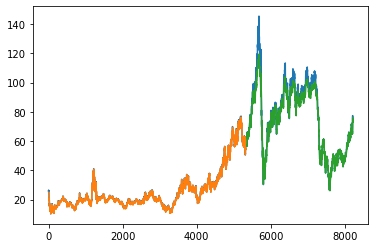

In [40]:
look_back = 10
trainPredictPlot = np.empty_like(oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(oil)-1, :] = test_predict
plt.plot(scaler.inverse_transform(oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
model.save("Crude.h5")

In [42]:
len(test_data)

2876

In [43]:
x_input = test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [44]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [45]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [46]:
len(temp_input)

10

### Predict the future 10 days and plot the graph

In [47]:
from numpy import array

lst_output = []
n_steps = 10
i = 0
while(i<10):
    
    if(len(temp_input)>10):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

print(lst_output)

[0.4691293]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.46912929]
1 day output [[0.4672809]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.46912929 0.46728089]
2 day output [[0.46561477]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.46912929 0.46728089 0.46561477]
3 day output [[0.4641253]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.46912929 0.46728089 0.46561477 0.46412531]
4 day output [[0.46280447]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.46912929
 0.46728089 0.46561477 0.46412531 0.46280447]
5 day output [[0.46155882]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.46912929 0.46728089
 0.46561477 0.46412531 0.46280447 0.46155882]
6 day output [[0.4603378]]
7 day input [0.46497853 0.47038353 0.47149415 0.46912929 0.46728089 0.

In [48]:
day_new = np.arange(1,11)
day_pred = np.arange(11,21)

In [49]:
len(oil)

8216

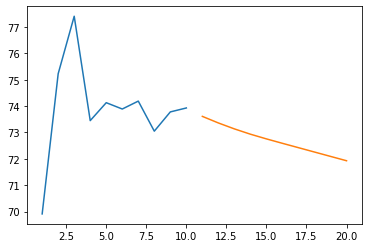

In [50]:
plt.plot(day_new,scaler.inverse_transform(oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

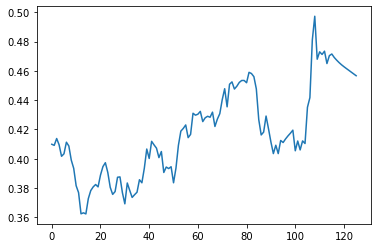

In [51]:
df3 = oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [52]:
df3 = scaler.inverse_transform(df3).tolist()

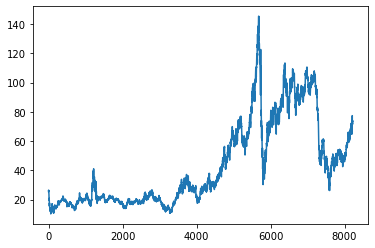

In [53]:
plt.plot(df3)